<a href="https://colab.research.google.com/github/phrenico/control-notebooks/blob/main/Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pendulum 

In [9]:
!pip install slycot
!pip install control
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import control.matlab as ctl


%matplotlib inline

The ODE description:
$$
\frac{\partial^2 \theta}{\partial t ^ 2} + s \frac{\partial \theta}{\partial t } + \frac{g}{L}\sin{\theta} = 0
$$


State space equations with variables $x_1 = \theta$, $x_2 = \dot{\theta}$:

$$
\begin{align}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= - \frac{g}{L} sin(x_1) - s x_2 
\end{align}
$$

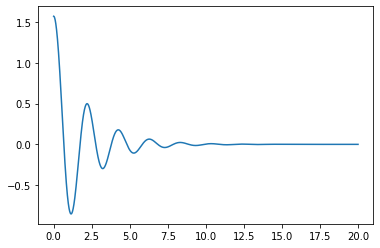

In [36]:
def f(x, t, s=1, L=1, g=9.81):
  dx1 = x[1]
  dx2 = - g / L *  np.sin(x[0]) - s * x[1]
  return [dx1, dx2]


s = 1
L= 1
g= 9.81

x0 = [np.pi/2, 0]
t = np.arange(0, 20, 0.01)

phi = odeint(f, x0, t)

plt.plot(t, phi[:, 0])

In [1]:
J_down = np.array([[0, 1], [-g / L, -s]])

J_up = np.array([[0, 1], [g / L, -s]])

np.linalg.eig(J_up)

NameError: ignored

In [ ]:
np.linalg.eig(J_down)

In [ ]:
# linearized dynamics
def lin_f(x, t, A=J_down):
  return np.dot(A, x)

x0 = [np.pi/4, 0]
t = np.arange(0, 20, 0.01)

phi = odeint(f, x0, t)
phi_approx = odeint(lin_f, x0, t)

plt.plot(t, phi_approx[:, 0])
plt.plot(t, phi[:, 0])

In [55]:
np.linalg.matrix_rank(ctl.ctrb(J_up, [[0],[1]]))

2